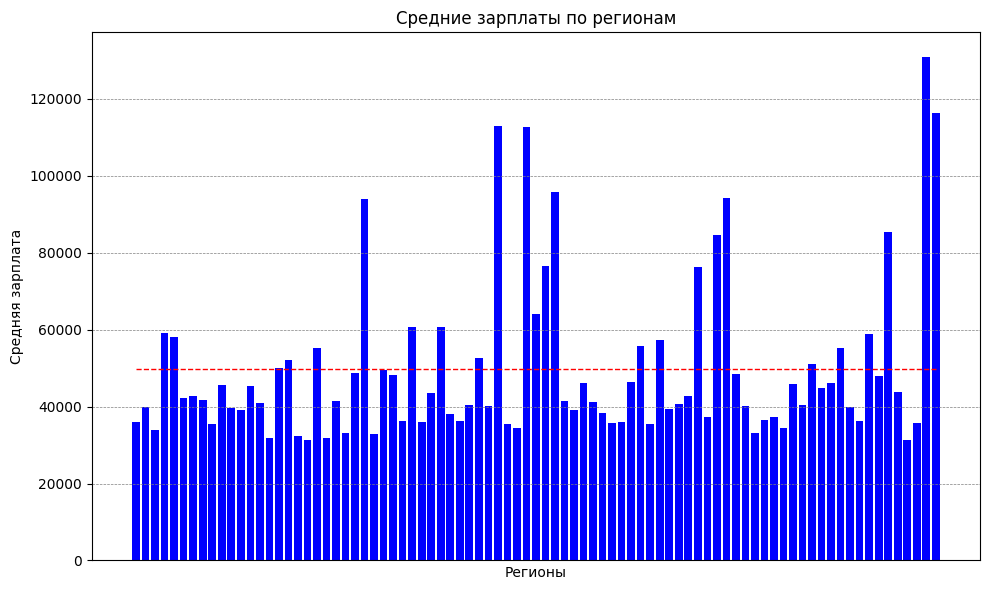

[112768, 64041, 52749, 40631, 42771, 48590, 34438, 55615, 41563, 46167]


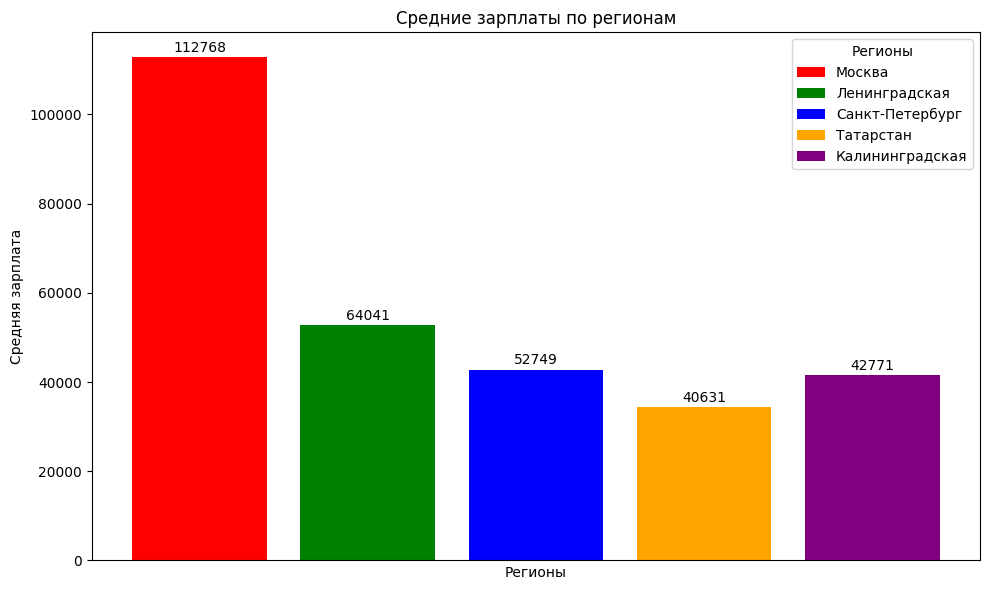

In [2]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f1 = open("HYPERLINK.csv").readlines()
salaries = []
i = 0
regions = open("nk").readlines()
regions = list(map(lambda x: x.split()[0], regions))
small = []
for stroka in f1:
    if '?' in stroka:
        salaries.append(small)
        small = []
    else:
        try:
            small.append(int(stroka.strip()))
        except ValueError:
            pass
salaries.pop(0)
salaries = list(map(lambda x: x[1], salaries))
d = {}
for i in range(len(salaries)):
    d[regions[i]] = salaries[i]
with open('../salaries', 'wb') as f:
    pickle.dump(d, f, pickle.HIGHEST_PROTOCOL)
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.bar(regions, salaries, color='blue')
plt.xlabel('Регионы')
plt.ylabel('Средняя зарплата')
plt.title('Средние зарплаты по регионам')
plt.xticks([])
plt.tight_layout()
for salary in range(20000, 140000, 20000):
    plt.axhline(y=salary, color='gray', linestyle='--', linewidth=0.5)
mean_salary = np.mean(salaries)
plt.plot(regions, [mean_salary] * len(regions), color='red', linestyle='--', linewidth=1, label='Средняя зарплата')
plt.savefig("ср_зп_все.png")
plt.show()
# -----------------------------------------------------------------------------
regions = [
    "Москва", "Московская", "Ленинградская", "Самарская",
    "Санкт-Петербург", "Севастополь", "Татарстан",
    "Приморский", "Калининградская", "Новосибирская"
]
salaries = []
for i in regions:
    salaries.append(d[i])
print(salaries)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'yellow'] * 10

plt.figure(figsize=(10, 6))
bars = plt.bar(regions[::2], salaries[::2], color=colors)
plt.legend(bars, regions[::2], title='Регионы')
plt.xticks([])
for bar, salary in zip(bars, salaries):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500, str(salary), ha='center', va='bottom')
plt.ylabel('Средняя зарплата')
plt.xlabel('Регионы')
plt.title('Средние зарплаты по регионам')
plt.tight_layout()
plt.savefig("ср_зп_топ10.png")
plt.show()
